### A/B Testing

A/B Testing means analyzing two marketing strategies to choose the best marketing strategy that can convert more traffic into sales (or more traffic into your desired goal) effectively and efficiently. A/B testing is one of the valuable concepts that every Data Science professional should know.

In A/B testing, we analyze the results of two marketing strategies to choose the best one for future marketing campaigns. For example, when I started an ad campaign on Instagram to promote my Instagram post for the very first time, my target audience was different from the target audience of my second ad campaign. After analyzing the results of both ad campaigns, I always preferred the audience of the second ad campaign as it gave better reach and followers than the first one.

That is what A/B testing means. Your goal can be to boost sales, followers, or traffic, but when we choose the best marketing strategy according to the results of our previous marketing campaigns, it is nothing but A/B testing.

For the task of A/B testing using Python, we need to have a dataset about two different marketing strategies for the same goal. I found a dataset that will help us perform A/B testing. You can download it from here: https://statso.io/a-b-testing-case-study/

### A/B testing using python

In [112]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [113]:
# read the control and test data
control_data = pd.read_csv("archive/control_group.csv", sep=";")
test_data = pd.read_csv("archive/test_group.csv", sep=";")

In [114]:
# let's have a look at both the datasets
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Let's give some new columnn name for ease of understanding and further processing.

In [116]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks", 
                     "Searches Received", "Content Viewed", "Added to Cart", "Purchases"]

In [117]:
# check the dimensions of the datasets
print("Control Group:", control_data.shape)
print("Test Group:", test_data.shape)

Control Group: (30, 10)
Test Group: (30, 10)


In [118]:
# check the datatypes
control_data.dtypes

Campaign Name             object
Date                      object
Amount Spent               int64
Number of Impressions    float64
Reach                    float64
Website Clicks           float64
Searches Received        float64
Content Viewed           float64
Added to Cart            float64
Purchases                float64
dtype: object

In [119]:
test_data.dtypes

Campaign Name            object
Date                     object
Amount Spent              int64
Number of Impressions     int64
Reach                     int64
Website Clicks            int64
Searches Received         int64
Content Viewed            int64
Added to Cart             int64
Purchases                 int64
dtype: object

In [120]:
# descriptive statistics
control_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Campaign Name,30,1,Control Campaign,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,30,30,1.08.2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount Spent,30.0,NaN,NaN,NaN,2288.433333,367.334451,1757.0,1945.5,2299.5,2532.0,3083.0
Number of Impressions,29.0,NaN,NaN,NaN,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
Reach,29.0,NaN,NaN,NaN,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
Website Clicks,29.0,NaN,NaN,NaN,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
Searches Received,29.0,NaN,NaN,NaN,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
Content Viewed,29.0,NaN,NaN,NaN,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
Added to Cart,29.0,NaN,NaN,NaN,1300.0,407.457973,442.0,930.0,1339.0,1641.0,1913.0
Purchases,29.0,NaN,NaN,NaN,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0


In [121]:
test_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Campaign Name,30,1,Test Campaign,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,30,30,1.08.2019,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount Spent,30.0,NaN,NaN,NaN,2563.066667,348.687681,1968.0,2324.5,2584.0,2836.25,3112.0
Number of Impressions,30.0,NaN,NaN,NaN,74584.8,32121.377422,22521.0,47541.25,68853.5,99500.0,133771.0
Reach,30.0,NaN,NaN,NaN,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
Website Clicks,30.0,NaN,NaN,NaN,6032.333333,1708.567263,3038.0,4407.0,6242.5,7604.75,8264.0
Searches Received,30.0,NaN,NaN,NaN,2418.966667,388.742312,1854.0,2043.0,2395.5,2801.25,2978.0
Content Viewed,30.0,NaN,NaN,NaN,1858.0,597.654669,858.0,1320.0,1881.0,2412.0,2801.0
Added to Cart,30.0,NaN,NaN,NaN,881.533333,347.584248,278.0,582.5,974.0,1148.5,1391.0
Purchases,30.0,NaN,NaN,NaN,521.233333,211.047745,238.0,298.0,500.0,701.0,890.0


In [122]:
# concise information
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign Name          30 non-null     object 
 1   Date                   30 non-null     object 
 2   Amount Spent           30 non-null     int64  
 3   Number of Impressions  29 non-null     float64
 4   Reach                  29 non-null     float64
 5   Website Clicks         29 non-null     float64
 6   Searches Received      29 non-null     float64
 7   Content Viewed         29 non-null     float64
 8   Added to Cart          29 non-null     float64
 9   Purchases              29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [123]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign Name          30 non-null     object
 1   Date                   30 non-null     object
 2   Amount Spent           30 non-null     int64 
 3   Number of Impressions  30 non-null     int64 
 4   Reach                  30 non-null     int64 
 5   Website Clicks         30 non-null     int64 
 6   Searches Received      30 non-null     int64 
 7   Content Viewed         30 non-null     int64 
 8   Added to Cart          30 non-null     int64 
 9   Purchases              30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [124]:
# duplicate records
control_data.duplicated().sum()

0

In [125]:
test_data.duplicated().sum()

0

In [126]:
# null/missing records
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [127]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column.

In [128]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), inplace=True)

In [129]:
# merge both the datasets
AB_Data = control_data.merge(test_data, how="outer").sort_values(["Date"]).reset_index(drop=True)
AB_Data.head()

d:\anaconda\envs\Deep_Learning\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [130]:
# campaign value counts
AB_Data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

#### A/B Testing to Find the Best Marketing Strategy

To get started with A/B testing, I will first analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns:

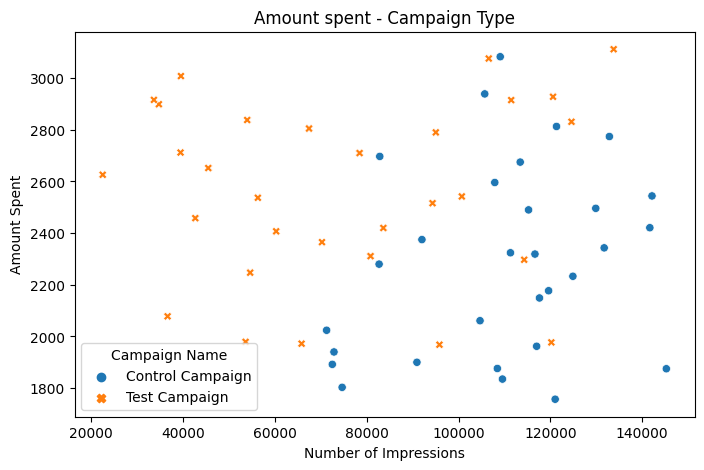

In [141]:
# Amount spent on both the campaigns
plt.figure(figsize=(8,5))
sns.scatterplot(x='Number of Impressions', y='Amount Spent', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Amount spent - Campaign Type')
plt.show()

The control campaign resulted in more impressions according to the amount spent on both campaigns. Now let’s have a look at the number of searches performed on the website from both campaigns:

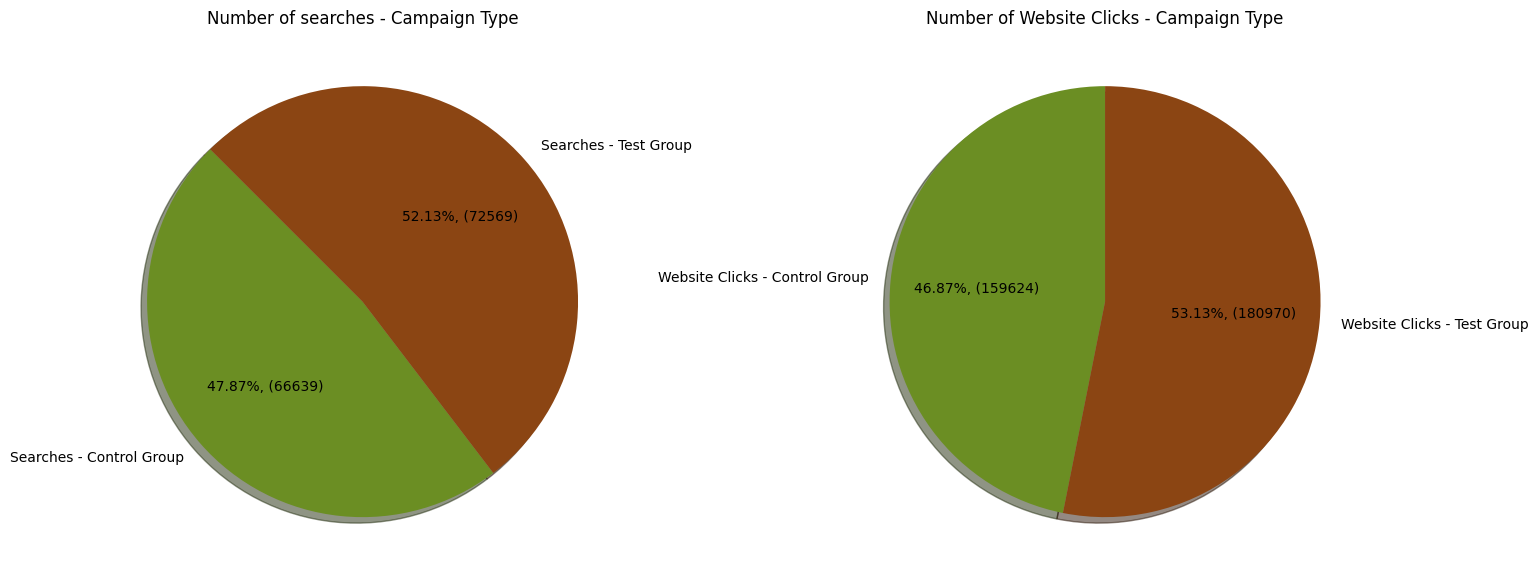

In [132]:
# Number of searches
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
labels = ["Searches - Control Group", "Searches - Test Group"]
sizes = [sum(control_data['Searches Received']), sum(test_data['Searches Received'])]

plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=135, shadow=True)
plt.title('Number of searches - Campaign Type')

# Number of website clicks
plt.subplot(1,2,2)
labels = ["Website Clicks - Control Group", "Website Clicks - Test Group"]
sizes = [sum(control_data['Website Clicks']), sum(test_data['Website Clicks'])]

plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Number of Website Clicks - Campaign Type')

plt.tight_layout()
plt.show()

The test campaign wins in the number of website clicks/searches recieved. Now let’s have a look at the amount of content viewed after reaching the website from both campaigns:

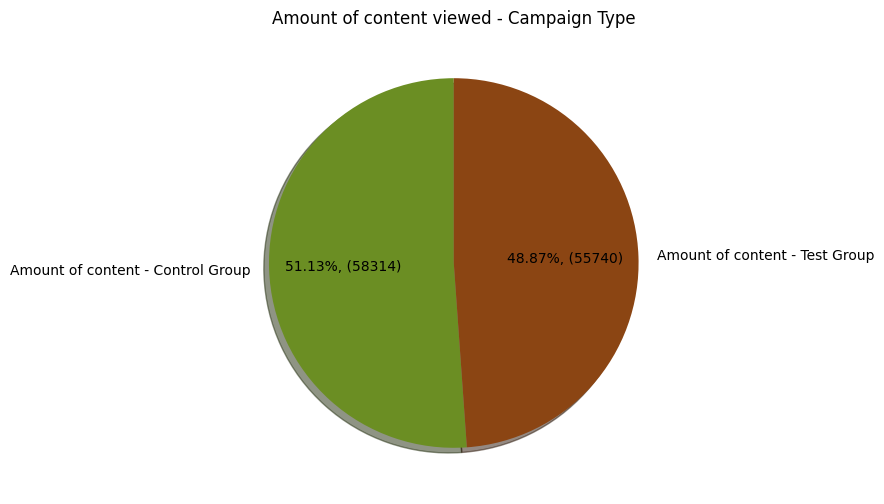

In [133]:
# Amount of content viewed
labels = ["Amount of content - Control Group", "Amount of content - Test Group"]
sizes = [sum(control_data['Content Viewed']), sum(test_data['Content Viewed'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Amount of content viewed - Campaign Type')
plt.show()

The audience of the control campaign viewed more content than the test campaign. Although there is not much difference, as the website clicks of the control campaign were low, its engagement on the website is higher than the test campaign.

Now let’s have a look at the number of products added to the cart from both campaigns:

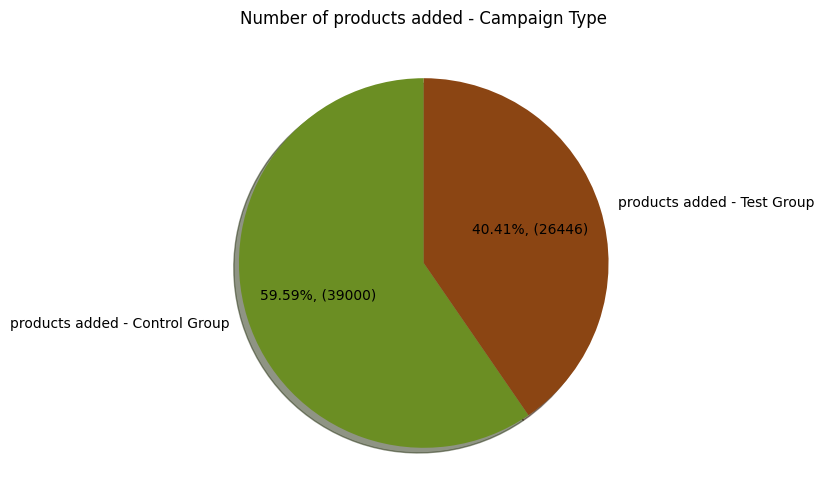

In [134]:
# Number of products added
labels = ["products added - Control Group", "products added - Test Group"]
sizes = [sum(control_data['Added to Cart']), sum(test_data['Added to Cart'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Number of products added - Campaign Type')
plt.show()

Despite low website clicks more products were added to the cart from the control campaign. Now let’s have a look at the amount spent on both campaigns:

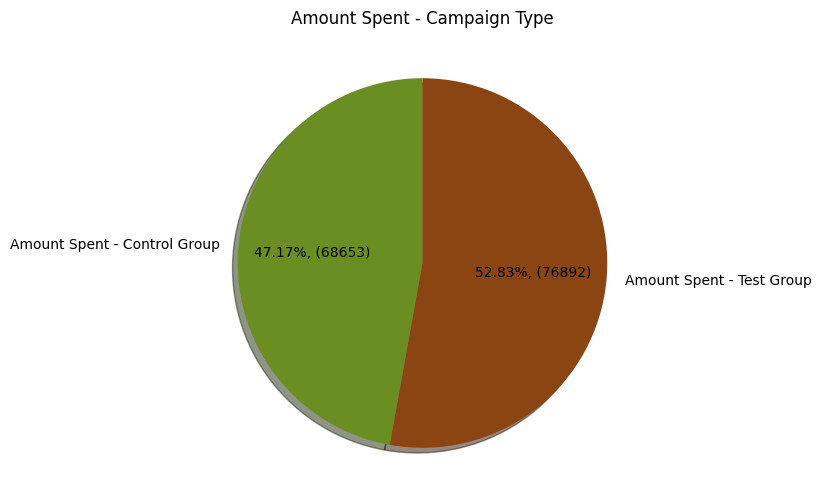

In [135]:
# Amount Spent
labels = ["Amount Spent - Control Group", "Amount Spent - Test Group"]
sizes = [sum(control_data['Amount Spent']), sum(test_data['Amount Spent'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Amount Spent - Campaign Type')
plt.show()

The amount spent on the test campaign is higher than the control campaign. But as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

Now let’s have a look at the purchases made by both campaigns:

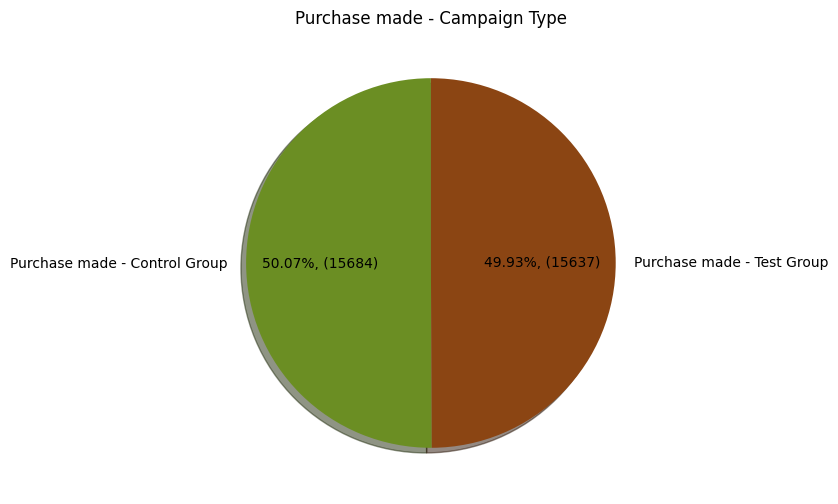

In [137]:
# Purchase made
labels = ["Purchase made - Control Group", "Purchase made - Test Group"]
sizes = [sum(control_data['Purchases']), sum(test_data['Purchases'])]

plt.figure(figsize=(6,6))
plt.pie(x=sizes, labels=labels, colors=['olivedrab','saddlebrown'], 
        autopct=lambda p:f'{p:.2f}%, ({p*sum(sizes)/100 :.0f})', startangle=90, shadow=True)
plt.title('Purchase made - Campaign Type')
plt.show()

There’s only a difference of around 1% in the purchases made from both ad campaigns. As the Control campaign resulted in more sales in less amount spent on marketing, the control campaign wins here!

Now let’s analyze some metrics to find which ad campaign converts more. I will first look at the relationship between the number of website clicks and content viewed from both campaigns:

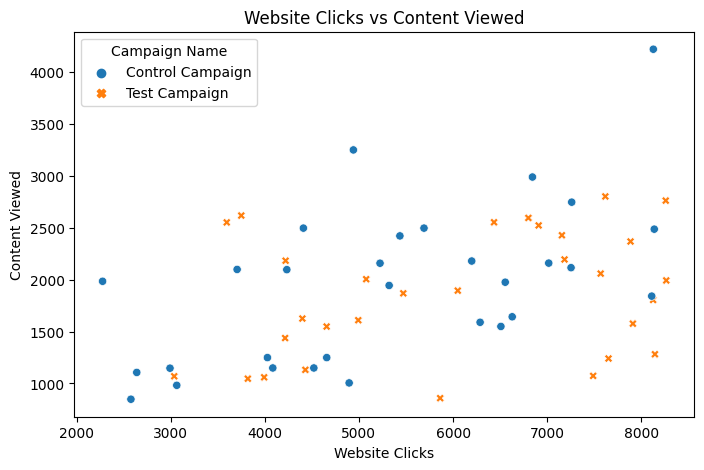

In [142]:
# Website Clicks vs Content Viewed
plt.figure(figsize=(8,5))
sns.scatterplot(x='Website Clicks', y='Content Viewed', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Website Clicks vs Content Viewed')
plt.show()

The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

Now I will analyze the relationship between the amount of content viewed and the number of products added to the cart from both campaigns:

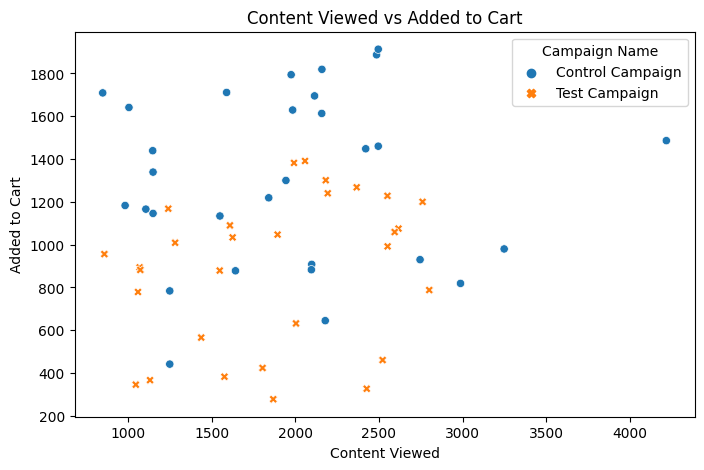

In [143]:
# Content Viewed vs Added to Cart
plt.figure(figsize=(8,5))
sns.scatterplot(x='Content Viewed', y='Added to Cart', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Content Viewed vs Added to Cart')
plt.show()

Again, the control campaign wins! Now let’s have a look at the relationship between the number of products added to the cart and the number of sales from both campaigns:

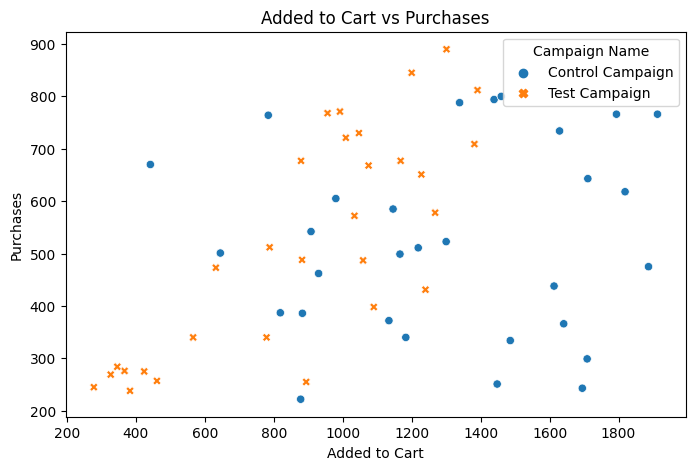

In [146]:
# Added to Cart vs Purchases
plt.figure(figsize=(8,5))
sns.scatterplot(x='Added to Cart', y='Purchases', data=AB_Data, hue='Campaign Name', style='Campaign Name')
plt.title('Added to Cart vs Purchases')
plt.show()

Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.

#### Conclusion:
From the above A/B tests, we found that the Control Campaign resulted in more sales and engagement from the visitors. More products were viewed from the Control Campaign, resulting in more products in the cart and more sales. But the conversation rate of products in the cart is higher in the Test Campaign. The Test Campaign resulted in more sales according to the products viewed and added to the cart. And the Control Campaign results in more sales overall. So, the Test Campaign can be used to market a specific product to a specific audience, and the Control Campaign can be used to market multiple products to a wider audience.